In [34]:
data_dir='KMC_LiverGrading\Training'
data_dir1='KMC_LiverGrading\Test'
data_dir2='KMC_LiverGrading\Validation'
import os

In [35]:
os.listdir(data_dir)

['grade0', 'grade1', 'grade2', 'grade3']

In [36]:
from torchvision.datasets import ImageFolder
train_dataset=ImageFolder(data_dir)
test_dataset=ImageFolder(data_dir1)
val_dataset=ImageFolder(data_dir2)

print(len(train_dataset))
print(len(test_dataset))
print(len(val_dataset))

2549
280
280


In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

2


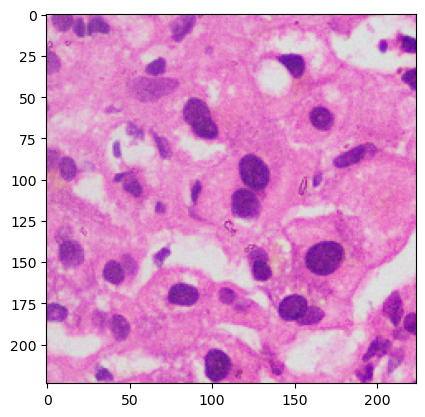

In [38]:
img,label=train_dataset[1318]
plt.imshow(img)
print(label)

In [39]:
import torchvision.transforms as tt
train_dataset=ImageFolder(data_dir,tt.Compose([tt.Resize(64), tt.RandomCrop(64), tt.ToTensor()]))
test_dataset=ImageFolder(data_dir1,tt.Compose([tt.Resize(64), tt.RandomCrop(64), tt.ToTensor()]))
val_dataset=ImageFolder(data_dir2,tt.Compose([tt.Resize(64), tt.RandomCrop(64), tt.ToTensor()]))

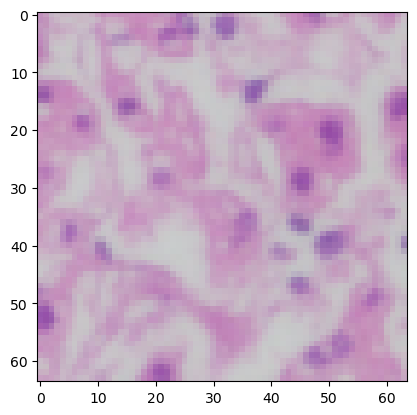

In [40]:
img,label=train_dataset[100]
plt.imshow(img.permute(1,2,0))

In [41]:
batch_size=128
from torch.utils.data import DataLoader

train_dl = DataLoader(train_dataset,
                      batch_size,
                      shuffle=True,
                      num_workers=4,
                      pin_memory=True)

valid_dl = DataLoader(val_dataset,
                    batch_size,
                    num_workers=4,
                    pin_memory=True)

In [42]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

In [43]:
train_dataset[1900]

(tensor([[[0.3922, 0.3922, 0.4078,  ..., 0.4431, 0.4314, 0.5176],
          [0.4431, 0.4353, 0.4549,  ..., 0.3725, 0.3765, 0.4627],
          [0.5373, 0.4824, 0.5137,  ..., 0.3804, 0.3765, 0.4353],
          ...,
          [0.4667, 0.5529, 0.8118,  ..., 0.8235, 0.8314, 0.8549],
          [0.6824, 0.7608, 0.9137,  ..., 0.8431, 0.8588, 0.8902],
          [0.8078, 0.9020, 0.9412,  ..., 0.8627, 0.8706, 0.9059]],
 
         [[0.1490, 0.1647, 0.1765,  ..., 0.1333, 0.1333, 0.1961],
          [0.1569, 0.1333, 0.1490,  ..., 0.1373, 0.1255, 0.1686],
          [0.1333, 0.1255, 0.1373,  ..., 0.1490, 0.1529, 0.1451],
          ...,
          [0.1451, 0.2627, 0.6784,  ..., 0.3961, 0.4078, 0.4314],
          [0.2784, 0.5176, 0.8157,  ..., 0.4039, 0.4392, 0.5176],
          [0.3725, 0.6157, 0.8353,  ..., 0.4235, 0.4588, 0.5725]],
 
         [[0.5451, 0.5255, 0.5608,  ..., 0.6000, 0.5961, 0.6471],
          [0.6118, 0.5922, 0.6078,  ..., 0.5490, 0.5451, 0.6039],
          [0.6902, 0.6549, 0.6706,  ...,

In [44]:
import torch

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [45]:
torch.cuda.is_available()


False

In [46]:
device = get_default_device()

In [47]:
device


device(type='cpu')

In [48]:
img

tensor([[[0.7569, 0.7725, 0.7725,  ..., 0.7569, 0.7686, 0.7882],
         [0.7490, 0.7569, 0.7765,  ..., 0.7608, 0.7804, 0.7882],
         [0.7608, 0.7569, 0.7843,  ..., 0.7804, 0.7882, 0.7725],
         ...,
         [0.7843, 0.7843, 0.7725,  ..., 0.7686, 0.7647, 0.7765],
         [0.7882, 0.7882, 0.7843,  ..., 0.7529, 0.7529, 0.7843],
         [0.7843, 0.7765, 0.7882,  ..., 0.7686, 0.7647, 0.7765]],

        [[0.5686, 0.6157, 0.7059,  ..., 0.5412, 0.6275, 0.7216],
         [0.5608, 0.5804, 0.6706,  ..., 0.5725, 0.6706, 0.7490],
         [0.5922, 0.5843, 0.6549,  ..., 0.6314, 0.7255, 0.7647],
         ...,
         [0.7412, 0.7333, 0.6353,  ..., 0.5451, 0.5882, 0.7098],
         [0.6902, 0.6941, 0.6392,  ..., 0.5647, 0.5647, 0.6627],
         [0.6314, 0.6235, 0.6392,  ..., 0.6039, 0.5843, 0.6549]],

        [[0.7412, 0.7490, 0.7765,  ..., 0.7373, 0.7529, 0.7843],
         [0.7373, 0.7333, 0.7686,  ..., 0.7294, 0.7608, 0.7843],
         [0.7451, 0.7294, 0.7725,  ..., 0.7490, 0.7804, 0.

In [49]:
img_gpu = to_device(img, device)
img_gpu.device

device(type='cpu')

In [50]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [51]:
import torch.nn as nn
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        "calculate loss for a batch of training data"
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        "calculate loss & accuracy for a batch of validation data"
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [52]:
@torch.no_grad()
def evaluate(model, val_loader):
    """Evaluates the model's performance on the validation set"""
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [53]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
              nn.BatchNorm2d(out_channels),
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # Input: 128 x 3 x 64 x 64
        self.conv1 = conv_block(in_channels, 64) # 128 x 64 x 64 x 64
        self.conv2 = conv_block(64, 128, pool=True) # 128 x 128 x 32 x 32
        self.res1 = nn.Sequential(conv_block(128, 128), # 128 x 128 x 32 x 32
                                  conv_block(128, 128)) # 128 x 128 x 32 x 32

        self.conv3 = conv_block(128, 256, pool=True) # 128 x 256 x 16 x 16
        self.conv4 = conv_block(256, 512, pool=True) # 128 x 512 x 8 x 8
        self.res2 = nn.Sequential(conv_block(512, 512), # 128 x 512 x 8 x 8
                                  conv_block(512, 512)) # 128 x 512 x 8 x 8

        self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), # 128 x 512 x 1 x 1
                                        nn.Flatten(), # 128 x 512
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))

    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [57]:
model = to_device(ResNet9(3, len(train_dataset.classes)), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [58]:
model.conv1[0].weight.device


device(type='cpu')

In [59]:
torch.cuda.empty_cache()
for batch in train_dl:
    images, labels = batch
    print('images.shape', images.shape)
    print('images.device', images.device)
    preds = model(images)
    print('preds.shape', preds.shape)
    break

images.shape torch.Size([128, 3, 64, 64])
images.device cpu
preds.shape torch.Size([128, 4])


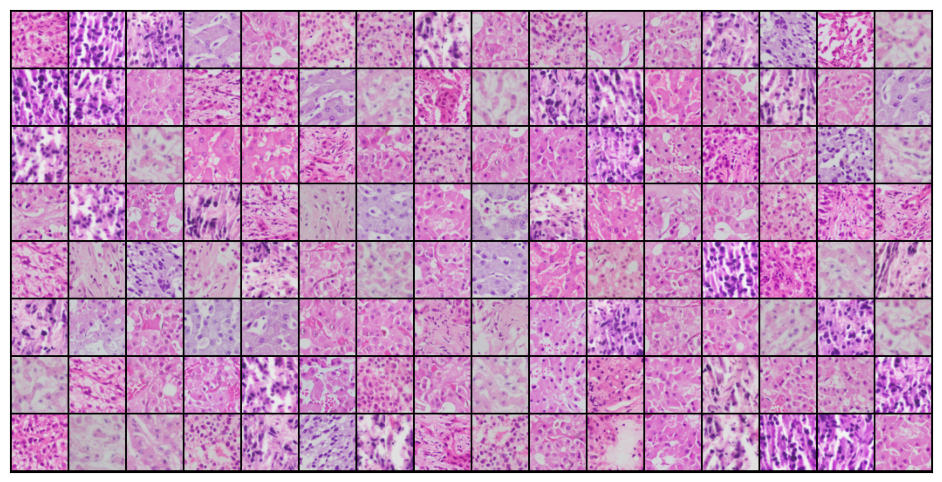

In [60]:
show_batch(train_dl)


In [61]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 1.3993672132492065, 'val_acc': 0.1822916716337204}]

In [63]:
history += fit(5, 0.001, model, train_dl, valid_dl, torch.optim.Adam)

Epoch [0], train_loss: 0.5913, val_loss: 4.2031, val_acc: 0.3689
Epoch [1], train_loss: 0.3135, val_loss: 1.1935, val_acc: 0.7101
Epoch [2], train_loss: 0.2483, val_loss: 1.3541, val_acc: 0.7361
Epoch [3], train_loss: 0.2334, val_loss: 0.6202, val_acc: 0.8403
Epoch [4], train_loss: 0.1959, val_loss: 0.5889, val_acc: 0.8247


In [ ]:
history += fit(5, 0.001, model, train_dl, valid_dl, torch.optim.Adam)

In [ ]:
history += fit(5, 0.0001, model, train_dl, valid_dl, torch.optim.Adam)

In [ ]:
history += fit(5, 0.0001, model, train_dl, valid_dl)

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
plot_accuracies(history)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [ ]:
plot_losses(history)

In [ ]:
### Record the Results
history[-1]

In [ ]:
### Test with Individual Images
def predict_image(img, model, classes):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return classes[preds[0].item()]

In [ ]:
def show_image_prediction(img, label):
    plt.imshow(img.permute((1, 2, 0)))
    pred = predict_image(img, model, train_dataset.classes)
    print('Target:', train_dataset.classes[label])
    print('Prediction:', pred)

In [ ]:
show_image_prediction(*test_dataset[100])